# Create Features for GER Classifications

In [7]:
import osmnx as os

In [2]:
import momepy as mp

In [3]:
import geopandas as gpd

In [4]:
import numpy as np

In [5]:
import pandas as pd

In [78]:
import libpysal

In [239]:
import matplotlib.pyplot as plt

## Import Data

In [100]:
old_bld = gpd.read_file(r'C:\Users\brand\Downloads\MLC_data.geojson')

### Import New Building Data

In [152]:
bld = gpd.read_file(r'C:\Users\brand\Downloads\MLC_data_new.geojson')

In [304]:
t = gpd.read_file(r'C:\Users\brand\Downloads\UB_gers.geojson')

In [321]:
bt = gpd.read_file(r'C:\Users\brand\Downloads\UB_blds_sep.geojson')

In [326]:
bt.head(200).explore()

In [317]:
t['duureg'].value_counts()

Bayanzurkh          10145
Songinokhairkhan     6458
Chingeltei           6281
Nalaikh              4796
Sukhbaatar           4413
Khan_uul             2086
Bayangol             1806
Baganuur               19
Name: duureg, dtype: int64

In [320]:
t[t['duureg']=='Bayanzurkh'].head(200).explore()

In [153]:
bld.head()

duureg         area  yurt  \
0  Bagakhangai  2021.889360     0   
1  Bagakhangai  1811.358912     0   
2  Bagakhangai  1760.263359     0   
3  Bagakhangai  2288.734374     0   
4  Bagakhangai   377.006317     0   

                                            geometry  
0  MULTIPOLYGON (((107.44265 47.37372, 107.44314 ...  
1  MULTIPOLYGON (((107.44346 47.37405, 107.44391 ...  
2  MULTIPOLYGON (((107.44338 47.37456, 107.44327 ...  
3  MULTIPOLYGON (((107.44255 47.37424, 107.44246 ...  
4  MULTIPOLYGON (((107.45400 47.35581, 107.45408 ...

In [336]:
t = t[['building', 'duureg', 'area', 'geometry']]
bt = bt[['building', 'duureg', 'area','geometry']]

In [345]:
t['building'].value_counts()

ger    36004
Name: building, dtype: int64

In [348]:
bld =pd.concat([t,bt])

Convert to Mongolian, CRS

In [123]:
#bld = bld.to_crs(32648)

In [146]:
#t = bld.to_crs(crs=32648 )

In [352]:
bld['yurt'] = np.where(bld['building'] == 'ger',1,0)

In [467]:
bld['building'].value_counts()

yes                 220351
house                65502
ger                  36004
apartment             1259
garage                 931
apartments             905
residential            465
industrial             456
commercial             267
barn                   206
school                 100
building                84
cabin                   79
kindergarten            77
hanger                  75
hospital                46
hotel                   40
service                 34
warehouse               28
dormitory               26
university              26
garages                 22
retail                  20
public                  14
detached                13
office                  13
train_station           13
church                   7
hangar                   4
shop                     4
nursery                  3
supermarket              3
exchange                 3
manufacture              3
shopping                 3
gas station              2
storage_building         1
c

In [355]:
bld.head(200).explore()

In [465]:
bld.sample(1000).explore()

In [468]:
bld.sample(1000).explore()

The spa by Gobi. Is a circle, is not labled as a yurt.

# Add Morphometric Features

### Dimension Based Features

Area

In [356]:
bld['new_area'] = mp.Area(bld).series

In [358]:
bld.head(10)

building            duureg       area  \
0      ger  Songinokhairkhan  19.921489   
1      ger  Songinokhairkhan  18.813264   
2      ger  Songinokhairkhan  23.761999   
3      ger  Songinokhairkhan  22.664676   
4      ger  Songinokhairkhan  30.363654   
5      ger  Songinokhairkhan  35.421874   
6      ger  Songinokhairkhan  27.635794   
7      ger  Songinokhairkhan  20.953504   
8      ger  Songinokhairkhan  40.032559   
9      ger  Songinokhairkhan  31.619672   

                                            geometry  yurt   new_area  
0  MULTIPOLYGON (((629447.992 5308071.519, 629446...     1  19.921489  
1  MULTIPOLYGON (((626068.132 5311134.514, 626066...     1  18.813264  
2  MULTIPOLYGON (((636193.818 5317044.398, 636194...     1  23.761999  
3  MULTIPOLYGON (((637331.546 5308800.357, 637332...     1  22.664676  
4  MULTIPOLYGON (((637208.996 5309018.364, 637209...     1  30.363654  
5  MULTIPOLYGON (((634348.879 5316116.467, 634348...     1  35.421874  
6  MULTIPOLYGON (((634390.147 5316126.104, 634390...     1  27.635794  
7  MULTIPOLYGON (((634365.510 5316114.631, 634365...     1  20.953504  
8  MULTIPOLYGON (((634307.644 5316116.894, 634307...     1  40.032559  
9  MULTIPOLYGON (((634379.778 5316134.702, 634380...     1  31.619672

[Perimeter](http://docs.momepy.org/en/stable/generated/momepy.Perimeter.html)

In [359]:
bld['perimeter'] = mp.Perimeter(bld).series

[Longest Axis Length](http://docs.momepy.org/en/stable/generated/momepy.LongestAxisLength.html#momepy.LongestAxisLength)

In [360]:
bld['longest_axis_length'] = mp.LongestAxisLength(bld).series

### Shape Based Features

[Circular Compactness](http://docs.momepy.org/en/stable/generated/momepy.CircularCompactness.html)

In [361]:
bld['circ_compact'] = mp.CircularCompactness(bld, 'new_area').series

In [650]:
bld[bld['yurt'] ==1]['fractal'].median()

0.9287231358657422

In [649]:
bld[bld['yurt'] ==0]['fractal'].median()

1.0066752955074847

[Squareness](http://docs.momepy.org/en/stable/generated/momepy.Squareness.html)

Not working.

In [363]:
bld['squareness'] = mp.Squareness(bld).series

  0%|          | 0/327098 [00:00<?, ?it/s]

In [364]:
bld.sample(10)

building            duureg        area  \
276254      yes        Sukhbaatar   20.314400   
221238      yes  Songinokhairkhan   73.711496   
161657      yes           Nalaikh   48.714320   
136653      yes          Khan_uul   39.651127   
82369       yes        Chingeltei   95.202939   
259079      yes        Sukhbaatar  539.997324   
103272      yes        Chingeltei   41.236810   
4100        yes          Bayangol  903.600563   
110779      yes        Chingeltei   26.812337   
118608    house        Chingeltei  195.869218   

                                                 geometry  yurt    new_area  \
276254  MULTIPOLYGON (((644282.358 5326296.091, 644283...     0   20.314400   
221238  MULTIPOLYGON (((633592.435 5309163.265, 633600...     0   73.711496   
161657  MULTIPOLYGON (((682744.009 5299728.294, 682749...     0   48.714320   
136653  MULTIPOLYGON (((628911.483 5300655.365, 628907...     0   39.651127   
82369   MULTIPOLYGON (((642421.628 5319534.608, 642432...     0   95.202939   
259079  MULTIPOLYGON (((641521.002 5331082.247, 641535...     0  539.997324   
103272  MULTIPOLYGON (((641943.829 5311242.154, 641942...     0   41.236810   
4100    MULTIPOLYGON (((638645.707 5307589.921, 638653...     0  903.600563   
110779  MULTIPOLYGON (((639764.534 5316158.806, 639764...     0   26.812337   
118608  MULTIPOLYGON (((643607.913 5316673.384, 643620...     0  195.869218   

         perimeter  longest_axis_length  circ_compact  squareness  
276254   18.037125             6.485678      0.614898         NaN  
221238   34.376709            12.173852      0.633271         NaN  
161657   29.246444            11.322963      0.483779         NaN  
136653   25.217149             8.940514      0.631598         NaN  
82369    39.325517            14.018461      0.616822         NaN  
259079  102.109148            36.376406      0.519592         NaN  
103272   22.869163             7.329500      0.977342         NaN  
4100    206.254015            69.231645      0.240037         NaN  
110779   18.441483             5.909476      0.977568         NaN  
118608   56.123113            19.893685      0.630153         NaN

[Convexity](http://docs.momepy.org/en/stable/generated/momepy.Convexity.html)

In [365]:
bld['convexity'] = mp.Convexity(bld).series

In [374]:
bld['convexity'].min()

0.18450459052332766

[Elongation](http://docs.momepy.org/en/stable/generated/momepy.Elongation.html)

In [367]:
bld['elongation'] = mp.Elongation(bld).series

[EquivalentRectangularIndex](http://docs.momepy.org/en/stable/generated/momepy.EquivalentRectangularIndex.html)

In [368]:
bld['EquivalentRectangularIndex'] = mp.EquivalentRectangularIndex(bld, 'area',
                                                        'perimeter').series

[Fractal Dimension](http://docs.momepy.org/en/stable/generated/momepy.FractalDimension.html)

[More on fractals](https://andrewsforest.oregonstate.edu/sites/default/files/lter/pubs/pdf/pub1538.pdf)

In [369]:
bld['fractal'] = mp.FractalDimension(bld,'area',   'perimeter').series

### Export Dimension and Shape Based Features

In [528]:
bld[bld['EquivalentRectangularIndex'] <= .8 ].head() 

building       duureg         area  \
23755      ger   Bayanzurkh  1136.111570   
26379      ger   Bayanzurkh   268.174066   
12         yes  Bagakhangai  1099.447606   
52         yes  Bagakhangai  1016.181888   
54         yes  Bagakhangai   873.143330   

                                                geometry  yurt     new_area  \
23755  MULTIPOLYGON (((646654.737 5313140.032, 646708...     1  1136.111570   
26379  MULTIPOLYGON (((646727.035 5313178.195, 646728...     1   268.174066   
12     MULTIPOLYGON (((688121.391 5247295.573, 688128...     0  1099.447606   
52     MULTIPOLYGON (((688111.895 5247145.342, 688138...     0  1016.181888   
54     MULTIPOLYGON (((688041.339 5247327.351, 688065...     0   873.143330   

        perimeter  longest_axis_length  circ_compact  squareness  convexity  \
23755  187.530152            66.202638      0.330051         NaN   0.818666   
26379   90.744780            31.133072      0.352276         NaN   0.748628   
12     170.249279            48.832167      0.587047         NaN   0.850974   
52     194.434748            75.264463      0.228403         NaN   0.700046   
54     181.333318            63.295648      0.277490         NaN   0.647692   

       elongation  EquivalentRectangularIndex   fractal  shared_walls_ratio  \
23755    0.476649                    0.768860  1.093801        0.000000e+00   
26379    0.411066                    0.794343  1.116581        0.000000e+00   
12       0.950360                    0.779296  1.071313       -1.669417e-16   
52       0.380527                    0.733828  1.121869        0.000000e+00   
54       0.475607                    0.697336  1.126399        0.000000e+00   

         uID  predictions  
23755  23755            1  
26379  26379            1  
12     36016            0  
52     36056            0  
54     36058            0

In [171]:
bld.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 327098 entries, 0 to 327097
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   duureg                      327098 non-null  object  
 1   area                        327098 non-null  float64 
 2   yurt                        327098 non-null  int64   
 3   geometry                    327098 non-null  geometry
 4   new_area                    327098 non-null  float64 
 5   perimeter                   327098 non-null  float64 
 6   longest_axis_length         327098 non-null  float64 
 7   circ_compact                327098 non-null  float64 
 8   squareness                  0 non-null       float64 
 9   convexity                   327098 non-null  float64 
 10  elongation                  327098 non-null  float64 
 11  EquivalentRectangularIndex  327098 non-null  float64 
 12  fractal                     327098 non-null  float

In [174]:
#bld[['duureg', 'area', 'yurt','circ_compact', 'new_area',
#       'squareness', 'convexity', 'elongation', 'perimeter',
#       'EquivalentRectangularIndex', 'fractal', 'longest_axis_length']].to_csv('new_yurt_dimension_shape_wgs84.csv')

# Add Weight Based Features


[Shared Walls Ratio](http://docs.momepy.org/en/stable/generated/momepy.SharedWallsRatio.html)

In [371]:
bld["shared_walls_ratio"] = mp.SharedWallsRatio(bld).series

In [372]:
bld['shared_walls_ratio'].max()

3.0

### Add Unique ID


In [373]:
bld["uID"] = range(len(bld))

### 

In [430]:
bld

building            duureg       area  \
0      ger  Songinokhairkhan  19.921489   
1      ger  Songinokhairkhan  18.813264   
2      ger  Songinokhairkhan  23.761999   
3      ger  Songinokhairkhan  22.664676   
4      ger  Songinokhairkhan  30.363654   

                                            geometry  yurt   new_area  \
0  MULTIPOLYGON (((629447.992 5308071.519, 629446...     1  19.921489   
1  MULTIPOLYGON (((626068.132 5311134.514, 626066...     1  18.813264   
2  MULTIPOLYGON (((636193.818 5317044.398, 636194...     1  23.761999   
3  MULTIPOLYGON (((637331.546 5308800.357, 637332...     1  22.664676   
4  MULTIPOLYGON (((637208.996 5309018.364, 637209...     1  30.363654   

   perimeter  longest_axis_length  circ_compact  squareness  convexity  \
0  16.090885             5.211475      0.933922         NaN        1.0   
1  15.636989             5.071900      0.931178         NaN        1.0   
2  17.747201             5.805732      0.897592         NaN        1.0   
3  16.954748             5.431605      0.978145         NaN        1.0   
4  19.624264             6.283401      0.979207         NaN        1.0   

   elongation  EquivalentRectangularIndex   fractal  shared_walls_ratio  uID  
0    0.950350                    1.109895  0.930516       -2.207904e-16    0  
1    0.946892                    1.109943  0.929164        0.000000e+00    1  
2    0.999111                    1.098681  0.940589        0.000000e+00    2  
3    0.995724                    1.123167  0.925564        0.000000e+00    3  
4    0.996301                    1.123167  0.931941       -1.810368e-16    4

### Add Tesselation

In [84]:
limit = mp.buffered_limit(bld, 100)

C:\Users\brand\anaconda3\envs\geo_ads\lib\site-packages\momepy\elements.py:57: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return gdf.buffer(buffer).unary_union


In [88]:
type(limit)

shapely.geometry.multipolygon.MultiPolygon

In [91]:
tessellation = mp.Tessellation(bld, "uID", limit, verbose=False, segment=1)

ValueError: Geometry is in a geographic CRS. Use 'GeoDataFrame.to_crs()' to re-project geometries to a projected CRS before using Tessellation.


In [ ]:
tessellation = tessellation.tessellation

### Add Queen Weights

In [ ]:
queen_1 = libpysal.weights.contiguity.Queen.from_dataframe(tessellation, ids="uID", silence_warnings=True)

In [77]:
bld[['duureg', 'area', 'yurt','circ_compact', 'new_area',
       'squareness', 'convexity', 'elongation', 'perimeter',
       'EquivalentRectangularIndex', 'fractal', 'longest_axis_length']]

TypeError: 'numpy.int32' object is not callable

### References

1. https://journals.sagepub.com/doi/10.1177/2399808317725075

### Random Forest Classifier

In [375]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [479]:
from sklearn.metrics import accuracy_score, f1_score,roc_auc_score, precision_score, recall_score

In [438]:
yurt =  pd.DataFrame(bld[bld['yurt'] ==1])
nonyurt = pd.DataFrame(bld[bld['yurt'] ==0]).sample(40000)
balanced_yurt = pd.concat([yurt, nonyurt])

In [439]:
X = balanced_yurt[[ 'area', 'new_area', 'perimeter',
       'longest_axis_length', 'circ_compact', 'convexity',
       'elongation', 'EquivalentRectangularIndex', 'fractal']]

In [440]:
y = balanced_yurt['yurt']

In [441]:
X.head()

area   new_area  perimeter  longest_axis_length  circ_compact  \
0  19.921489  19.921489  16.090885             5.211475      0.933922   
1  18.813264  18.813264  15.636989             5.071900      0.931178   
2  23.761999  23.761999  17.747201             5.805732      0.897592   
3  22.664676  22.664676  16.954748             5.431605      0.978145   
4  30.363654  30.363654  19.624264             6.283401      0.979207   

   convexity  elongation  EquivalentRectangularIndex   fractal  
0        1.0    0.950350                    1.109895  0.930516  
1        1.0    0.946892                    1.109943  0.929164  
2        1.0    0.999111                    1.098681  0.940589  
3        1.0    0.995724                    1.123167  0.925564  
4        1.0    0.996301                    1.123167  0.931941

In [442]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [443]:
clf = RandomForestClassifier(n_estimators=10000, random_state=42)

In [444]:
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10000, random_state=42)

In [447]:
prediction = clf.predict(X_test)

In [531]:
balanced_yurt['predictions'] = clf.predict(X)

In [532]:
balanced_yurt['predictions'].value_counts()

0    39204
1    36800
Name: predictions, dtype: int64

In [533]:
balanced_yurt['yurt'].value_counts()

0    40000
1    36004
Name: yurt, dtype: int64

In [446]:
#print('ROCAUC score:',roc_auc_score(y_test, prediction))
print('Accuracy score:',accuracy_score(y_test, prediction))
print('F1 score:',f1_score(y_test, prediction))

Accuracy score: 0.921585825804754
F1 score: 0.9195029713668287


In [449]:
#print('ROCAUC score:',roc_auc_score(y_test, prediction))
print('Accuracy score:',accuracy_score(y_test, prediction))
print('F1 score:',f1_score(y_test, prediction))

Accuracy score: 0.921585825804754
F1 score: 0.9195029713668287


### Precision Score

In [483]:
precision_score(y_test, prediction)

0.8876912378303199

### Recall Score

In [484]:
recall_score(y_test, prediction)

0.9536794919686216

### 

In [450]:
importances = clf.feature_importances_

In [451]:
feature_names = [f"feature {i}" for i in X.columns]

In [452]:
importances

array([0.0402906 , 0.04077622, 0.0550251 , 0.07566189, 0.20072505,
       0.00108206, 0.11959123, 0.19555626, 0.27129159])

<AxesSubplot:>

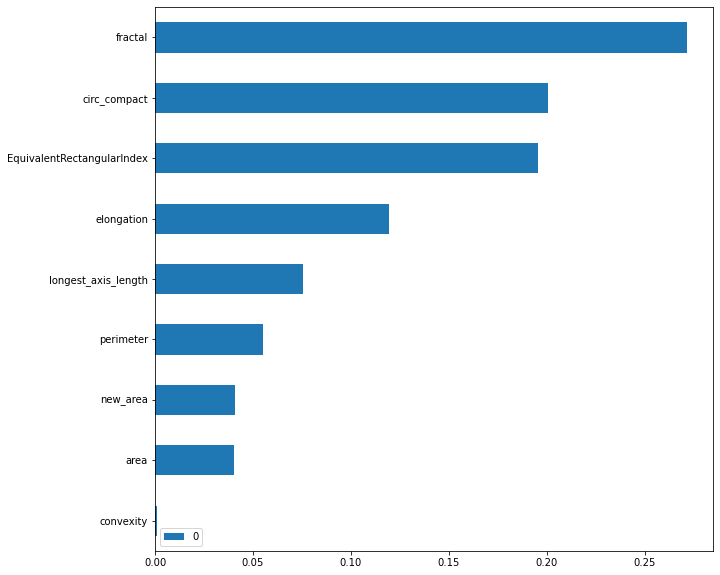

In [453]:
pd.DataFrame(importances, X.columns).sort_values(by=0, ascending=True).plot(kind='barh', figsize=(10,10))

In [644]:
pd.DataFrame(importances, X.columns).rename(columns={0:'Permutation Based Feature Importance'}).to_csv('feature_importance.csv')

<AxesSubplot:>

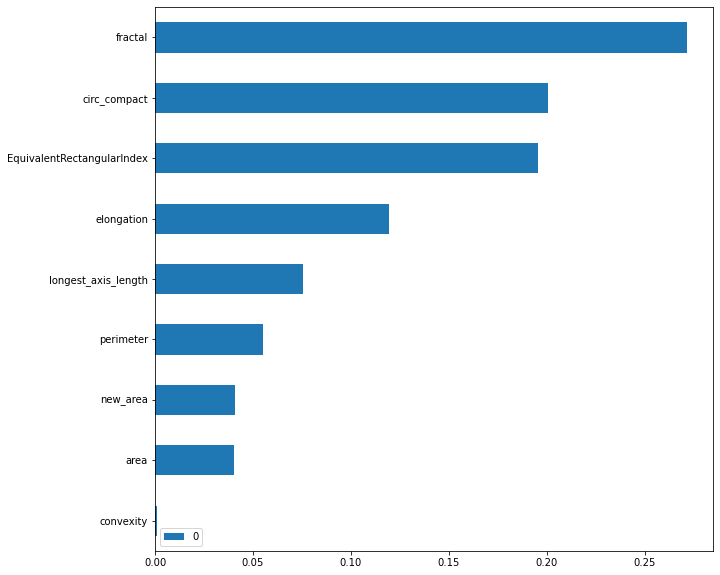

In [454]:
pd.DataFrame(importances, X.columns).sort_values(by=0, ascending=True).plot(kind='barh', figsize=(10,10))

In [ ]:
precision_score()

In [645]:
bld.head()

building            duureg       area  \
0      ger  Songinokhairkhan  19.921489   
1      ger  Songinokhairkhan  18.813264   
2      ger  Songinokhairkhan  23.761999   
3      ger  Songinokhairkhan  22.664676   
4      ger  Songinokhairkhan  30.363654   

                                            geometry  yurt   new_area  \
0  MULTIPOLYGON (((629447.992 5308071.519, 629446...     1  19.921489   
1  MULTIPOLYGON (((626068.132 5311134.514, 626066...     1  18.813264   
2  MULTIPOLYGON (((636193.818 5317044.398, 636194...     1  23.761999   
3  MULTIPOLYGON (((637331.546 5308800.357, 637332...     1  22.664676   
4  MULTIPOLYGON (((637208.996 5309018.364, 637209...     1  30.363654   

   perimeter  longest_axis_length  circ_compact  squareness  convexity  \
0  16.090885             5.211475      0.933922         NaN        1.0   
1  15.636989             5.071900      0.931178         NaN        1.0   
2  17.747201             5.805732      0.897592         NaN        1.0   
3  16.954748             5.431605      0.978145         NaN        1.0   
4  19.624264             6.283401      0.979207         NaN        1.0   

   elongation  EquivalentRectangularIndex   fractal  shared_walls_ratio  uID  \
0    0.950350                    1.109895  0.930516       -2.207904e-16    0   
1    0.946892                    1.109943  0.929164        0.000000e+00    1   
2    0.999111                    1.098681  0.940589        0.000000e+00    2   
3    0.995724                    1.123167  0.925564        0.000000e+00    3   
4    0.996301                    1.123167  0.931941       -1.810368e-16    4   

   predictions  
0            1  
1            1  
2            1  
3            1  
4            1

In [409]:
#balanced_yurt['predictions'] = clf.predict(X)

In [455]:
bld['predictions'] = clf.predict(bld[[ 'area', 'new_area', 'perimeter',
       'longest_axis_length', 'circ_compact', 'convexity',
       'elongation', 'EquivalentRectangularIndex', 'fractal']])

In [414]:
type(balancbed_yurt)

pandas.core.frame.DataFrame

In [500]:
bld['predictions'].value_counts()

0    263286
1     63812
Name: predictions, dtype: int64

In [501]:
bld['yurt'].value_counts()

0    291094
1     36004
Name: yurt, dtype: int64

In [505]:
bld[(bld['predictions'] ==1) & (bld['yurt'] ==1)].shape

(35508, 17)

### Accurate

In [509]:
bld[(bld['predictions'] ==1) & (bld['yurt'] ==1)].shape[0] / bld[bld['yurt'] ==1].shape[0]

0.9862237529163427

In [521]:
bld[(bld['predictions'] ==1) & (bld['yurt'] ==0)].head(1000).explore()

In [524]:
bld.head()

building            duureg       area  \
0      ger  Songinokhairkhan  19.921489   
1      ger  Songinokhairkhan  18.813264   
2      ger  Songinokhairkhan  23.761999   
3      ger  Songinokhairkhan  22.664676   
4      ger  Songinokhairkhan  30.363654   

                                            geometry  yurt   new_area  \
0  MULTIPOLYGON (((629447.992 5308071.519, 629446...     1  19.921489   
1  MULTIPOLYGON (((626068.132 5311134.514, 626066...     1  18.813264   
2  MULTIPOLYGON (((636193.818 5317044.398, 636194...     1  23.761999   
3  MULTIPOLYGON (((637331.546 5308800.357, 637332...     1  22.664676   
4  MULTIPOLYGON (((637208.996 5309018.364, 637209...     1  30.363654   

   perimeter  longest_axis_length  circ_compact  squareness  convexity  \
0  16.090885             5.211475      0.933922         NaN        1.0   
1  15.636989             5.071900      0.931178         NaN        1.0   
2  17.747201             5.805732      0.897592         NaN        1.0   
3  16.954748             5.431605      0.978145         NaN        1.0   
4  19.624264             6.283401      0.979207         NaN        1.0   

   elongation  EquivalentRectangularIndex   fractal  shared_walls_ratio  uID  \
0    0.950350                    1.109895  0.930516       -2.207904e-16    0   
1    0.946892                    1.109943  0.929164        0.000000e+00    1   
2    0.999111                    1.098681  0.940589        0.000000e+00    2   
3    0.995724                    1.123167  0.925564        0.000000e+00    3   
4    0.996301                    1.123167  0.931941       -1.810368e-16    4   

   predictions  
0            1  
1            1  
2            1  
3            1  
4            1

In [ ]:
bld[(bld['predictions'] ==1) & (bld['yurt'] ==1)].shape[0] / bld[bld['yurt'] ==1].shape[0]

In [564]:
bld['EquivalentRectangularIndex'].max()

1.1267691208473074

In [576]:
bld['circ_compact'].min()

0.00028181197105173726

In [580]:
bld['perimeter'].max()

1334.2880855165063

In [607]:
bld[bld['perimeter'] >= 300].head(1).explore()

In [611]:
bld[bld['circ_compact'] >= 0.9].head(1).explore()

In [569]:
bld[bld['EquivalentRectangularIndex'] == 0.27975739173184344].explore()

In [ ]:
bld[bld['EquivalentRectangularIndex'] == 0.27975739173184344].explore()

In [624]:
bld['longest_axis_length'].max()

377.56327504855886

In [632]:
bld[bld['longest_axis_length'] >= 370.56327504855886].explore()

<Axes:>

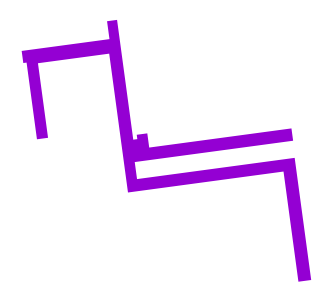

In [604]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)

bld[bld['EquivalentRectangularIndex'] == 0.27975739173184344].plot(ax=ax, color='darkviolet' )

In [640]:
bld['yurt'].value_counts()

0    291094
1     36004
Name: yurt, dtype: int64

<Axes:>

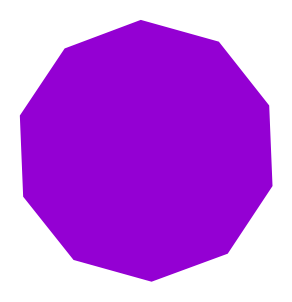

In [613]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)

bld[bld['circ_compact'] >= 0.9].head(1).plot(ax=ax, color='darkviolet' )

In [634]:
bld[bld['circ_compact'] >= 0.9].head(1)

building            duureg       area  \
0      ger  Songinokhairkhan  19.921489   

                                            geometry  yurt   new_area  \
0  MULTIPOLYGON (((629447.992 5308071.519, 629446...     1  19.921489   

   perimeter  longest_axis_length  circ_compact  squareness  convexity  \
0  16.090885             5.211475      0.933922         NaN        1.0   

   elongation  EquivalentRectangularIndex   fractal  shared_walls_ratio  uID  \
0     0.95035                    1.109895  0.930516       -2.207904e-16    0   

   predictions  
0            1

<Axes:>

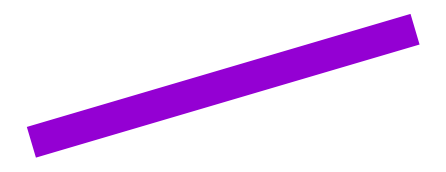

In [616]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)

bld[bld['elongation'] <= 0.1].head(1).plot(ax=ax, color='darkviolet' )

In [636]:
bld[bld['elongation'] <= 0.1].head(1)

building       duureg        area  \
186    house  Bagakhangai  475.787671   

                                              geometry  yurt    new_area  \
186  MULTIPOLYGON (((686872.204 5245541.764, 686946...     0  475.787671   

      perimeter  longest_axis_length  circ_compact  squareness  convexity  \
186  166.666498            77.420308      0.101068         NaN        1.0   

     elongation  EquivalentRectangularIndex   fractal  shared_walls_ratio  \
186    0.079975                    0.999598  1.209965                 0.0   

       uID  predictions  
186  36190            0

<Axes:>

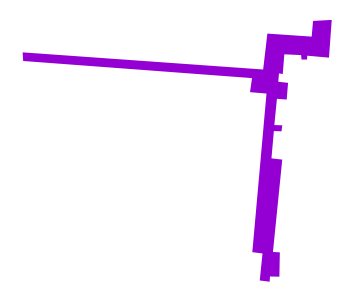

In [621]:
#bld[bld['fractal'] >= 1.2]
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)

bld[bld['uID'] == 53516].plot(ax=ax, color='darkviolet' )

In [635]:

bld[bld['uID'] == 53516]

building      duureg         area  \
17512      yes  Bayanzurkh  3591.729971   

                                                geometry  yurt     new_area  \
17512  MULTIPOLYGON (((647419.843 5309269.308, 647432...     0  3591.729971   

        perimeter  longest_axis_length  circ_compact  squareness  convexity  \
17512  815.114904           239.751141       0.07956         NaN   0.184505   

       elongation  EquivalentRectangularIndex   fractal  shared_walls_ratio  \
17512    0.818066                    0.295582  1.298994                 0.0   

         uID  predictions  
17512  53516            0

<Axes:>

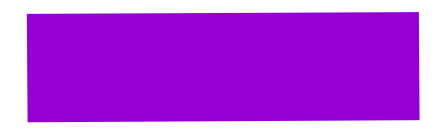

In [633]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)

bld[bld['longest_axis_length'] >= 370.56327504855886].plot(ax=ax, color='darkviolet' )

In [622]:
bld.head()

building            duureg       area  \
0      ger  Songinokhairkhan  19.921489   
1      ger  Songinokhairkhan  18.813264   
2      ger  Songinokhairkhan  23.761999   
3      ger  Songinokhairkhan  22.664676   
4      ger  Songinokhairkhan  30.363654   

                                            geometry  yurt   new_area  \
0  MULTIPOLYGON (((629447.992 5308071.519, 629446...     1  19.921489   
1  MULTIPOLYGON (((626068.132 5311134.514, 626066...     1  18.813264   
2  MULTIPOLYGON (((636193.818 5317044.398, 636194...     1  23.761999   
3  MULTIPOLYGON (((637331.546 5308800.357, 637332...     1  22.664676   
4  MULTIPOLYGON (((637208.996 5309018.364, 637209...     1  30.363654   

   perimeter  longest_axis_length  circ_compact  squareness  convexity  \
0  16.090885             5.211475      0.933922         NaN        1.0   
1  15.636989             5.071900      0.931178         NaN        1.0   
2  17.747201             5.805732      0.897592         NaN        1.0   
3  16.954748             5.431605      0.978145         NaN        1.0   
4  19.624264             6.283401      0.979207         NaN        1.0   

   elongation  EquivalentRectangularIndex   fractal  shared_walls_ratio  uID  \
0    0.950350                    1.109895  0.930516       -2.207904e-16    0   
1    0.946892                    1.109943  0.929164        0.000000e+00    1   
2    0.999111                    1.098681  0.940589        0.000000e+00    2   
3    0.995724                    1.123167  0.925564        0.000000e+00    3   
4    0.996301                    1.123167  0.931941       -1.810368e-16    4   

   predictions  
0            1  
1            1  
2            1  
3            1  
4            1

In [562]:
bld[bld['EquivalentRectangularIndex'] <= .956]

building            duureg         area  \
1876        ger  Songinokhairkhan   250.854265   
1877        ger  Songinokhairkhan   193.318639   
6136        ger  Songinokhairkhan    78.152236   
6149        ger  Songinokhairkhan   146.489130   
7298        ger           Nalaikh    72.589451   
...         ...               ...          ...   
291018      yes        Sukhbaatar   177.058053   
291020   school        Sukhbaatar  2226.881875   
291023    house        Sukhbaatar   112.595206   
291050      yes        Sukhbaatar    39.368508   
291085      yes        Sukhbaatar   114.828409   

                                                 geometry  yurt     new_area  \
1876    MULTIPOLYGON (((637718.612 5308884.973, 637733...     1   250.854265   
1877    MULTIPOLYGON (((637725.311 5308891.172, 637745...     1   193.318639   
6136    MULTIPOLYGON (((637522.639 5310470.616, 637533...     1    78.152236   
6149    MULTIPOLYGON (((637631.729 5309484.212, 637641...     1   146.489130   
7298    MULTIPOLYGON (((683464.975 5280376.333, 683471...     1    72.589451   
...                                                   ...   ...          ...   
291018  MULTIPOLYGON (((642973.088 5310371.145, 642991...     0   177.058053   
291020  MULTIPOLYGON (((643301.925 5313099.318, 643316...     0  2226.881875   
291023  MULTIPOLYGON (((641328.592 5328404.374, 641335...     0   112.595206   
291050  MULTIPOLYGON (((643352.003 5315358.459, 643356...     0    39.368508   
291085  MULTIPOLYGON (((641726.912 5328866.922, 641737...     0   114.828409   

         perimeter  longest_axis_length  circ_compact  squareness  convexity  \
1876     68.814819            24.309121      0.540497         NaN   0.918128   
1877     71.281966            26.489547      0.350780         NaN   0.813754   
6136     38.506422            13.812241      0.521583         NaN   0.930454   
6149     51.279624            18.299156      0.556998         NaN   0.953097   
7298     37.549664            12.754085      0.568179         NaN   0.910094   
...            ...                  ...           ...         ...        ...   
291018   65.077469            23.294071      0.415466         NaN   0.813597   
291020  292.715964            88.263696      0.363951         NaN   0.669426   
291023   45.626268            15.138482      0.625555         NaN   0.926578   
291050   27.555277            10.113909      0.490028         NaN   0.924806   
291085   46.805875            17.293092      0.488893         NaN   0.922133   

        elongation  EquivalentRectangularIndex   fractal  shared_walls_ratio  \
1876      0.927021                    0.921299  1.029933        0.000000e+00   
1877      0.490925                    0.830109  1.094287       -1.993612e-16   
6136      0.702878                    0.932634  1.039095        0.000000e+00   
6149      0.747396                    0.954122  1.023070        0.000000e+00   
7298      0.786888                    0.914117  1.045258        0.000000e+00   
...            ...                         ...       ...                 ...   
291018    0.729383                    0.828077  1.077676        0.000000e+00   
291020    0.651594                    0.659701  1.113832        0.000000e+00   
291023    0.964725                    0.930411  1.030607        0.000000e+00   
291050    0.923745                    0.911530  1.050867        0.000000e+00   
291085    0.919274                    0.916577  1.037102        0.000000e+00   

           uID  predictions  
1876      1876            1  
1877      1877            0  
6136      6136            1  
6149      6149            0  
7298      7298            0  
...        ...          ...  
291018  327022            0  
291020  327024            0  
291023  327027            0  
291050  327054            0  
291085  327089            0  

[36903 rows x 17 columns]

In [556]:
bld['elongation'].min()

0.00044266920575198015

In [615]:
bld[bld['elongation'] <= 0.1].head(1).explore()

In [540]:
bld[bld['fractal'] >= 1.2].head(200).explore()

In [547]:
bld[bld['fractal'] >= 1.4].explore()

In [427]:
gpd.GeoDataFrame(bld).head(20).explore()

In [275]:
gpd.GeoDataFrame(balanced_yurt).to_file(r'C:\Users\brand\OneDrive\Documents\grad-school\ml_cities\ger_classification\ger_classification\balanced_yurt.geojson', driver='GeoJSON')

C:\Users\brand\anaconda3\envs\geo_ads\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [284]:
balanced_yurt['circ_compact'].mean()

0.7160556623777556

In [288]:
balanced_yurt[balanced_yurt['longest_axis_length'] >= .589]['yurt'].value_counts()

1    36004
Name: yurt, dtype: int64

In [517]:
bld['predictions'].value_counts()

0    263286
1     63812
Name: predictions, dtype: int64

### New Gers

In [518]:
63812 - 36004 - 27808

27808

### Export CSV Data

In [472]:
balanced_yurt.to_csv(r'C:\Users\brand\OneDrive\Documents\grad-school\ml_cities\ger_classification\ger_classification\final_balanced_yurt.csv')

In [474]:
bld.to_csv(r'C:\Users\brand\OneDrive\Documents\grad-school\ml_cities\ger_classification\ger_classification\final_full_bld.csv')

In [476]:
bld.sample(10)

building            duureg         area  \
10284     house          Bayangol    37.111304   
107309      yes        Chingeltei    25.843893   
189559    house  Songinokhairkhan   257.738542   
2858        yes          Bayangol  2182.823970   
242277    house  Songinokhairkhan   158.963005   
246100      yes  Songinokhairkhan    35.746450   
180396      yes  Songinokhairkhan    43.759605   
25602       ger        Bayanzurkh    21.975127   
6480        yes          Bayangol   100.813007   
130730    house          Khan_uul    70.197912   

                                                 geometry  yurt     new_area  \
10284   MULTIPOLYGON (((639530.639 5310971.218, 639536...     0    37.111304   
107309  MULTIPOLYGON (((642889.079 5311772.478, 642888...     0    25.843893   
189559  MULTIPOLYGON (((636268.733 5312813.096, 636289...     0   257.738542   
2858    MULTIPOLYGON (((641367.032 5309933.965, 641303...     0  2182.823970   
242277  MULTIPOLYGON (((630107.312 5307607.270, 630121...     0   158.963005   
246100  MULTIPOLYGON (((635201.966 5312706.374, 635200...     0    35.746450   
180396  MULTIPOLYGON (((632106.042 5308406.019, 632113...     0    43.759605   
25602   MULTIPOLYGON (((655809.411 5309346.657, 655808...     1    21.975127   
6480    MULTIPOLYGON (((639649.905 5309213.263, 639661...     0   100.813007   
130730  MULTIPOLYGON (((631651.960 5302546.465, 631661...     0    70.197912   

         perimeter  longest_axis_length  circ_compact  squareness  convexity  \
10284    24.575985             8.777795      0.613261         NaN        1.0   
107309   18.104687             5.801586      0.977630         NaN        1.0   
189559   66.714271            24.443534      0.549239         NaN        1.0   
2858    204.227203            77.921293      0.457738         NaN        1.0   
242277   50.735043            18.054444      0.620923         NaN        1.0   
246100   21.292921             6.820508      0.978385         NaN        1.0   
180396   26.953843             9.708096      0.591174         NaN        1.0   
25602    16.695105             5.350659      0.977298         NaN        1.0   
6480     40.568723            14.489750      0.611371         NaN        1.0   
130730   34.104463            12.433611      0.578149         NaN        1.0   

        elongation  EquivalentRectangularIndex   fractal  shared_walls_ratio  \
10284     0.767824                    1.000185  1.004712        1.445604e-16   
107309    0.997200                    1.123177  0.928562        1.962317e-16   
189559    0.573679                    0.999960  1.013744       -2.130107e-16   
2858      0.424804                    1.000199  1.023087        0.000000e+00   
242277    0.802578                    1.000047  1.002362       -1.400497e-16   
246100    0.991634                    1.123169  0.935050       -1.668495e-16   
180396    0.679283                    1.000102  1.009779        0.000000e+00   
25602     0.996630                    1.123148  0.924830       -2.127997e-16   
6480      0.752947                    0.999962  1.004365        0.000000e+00   
130730    0.684935                    1.000321  1.008221        0.000000e+00   

           uID  predictions  
10284    46288            0  
107309  143313            1  
189559  225563            0  
2858     38862            0  
242277  278281            0  
246100  282104            0  
180396  216400            0  
25602    25602            1  
6480     42484            0  
130730  166734            0

### Export Geojson

In [469]:
bld.to_file(r'C:\Users\brand\OneDrive\Documents\grad-school\ml_cities\ger_classification\ger_classification\final_full_bld.geojson', driver='GeoJSON')

C:\Users\brand\anaconda3\envs\geo_ads\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [535]:
gpd.GeoDataFrame(balanced_yurt).to_crs(epsg=4326).to_file(r'C:\Users\brand\OneDrive\Documents\grad-school\ml_cities\ger_classification\ger_classification\final_balanced_yurt.geojson', driver='GeoJSON')

C:\Users\brand\anaconda3\envs\geo_ads\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [534]:
gpd.GeoDataFrame(balanced_yurt).crs

<Derived Projected CRS: EPSG:32648>
Name: WGS 84 / UTM zone 48N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 102°E and 108°E, northern hemisphere between equator and 84°N, onshore and offshore. Cambodia. China. Indonesia. Laos. Malaysia - West Malaysia. Mongolia. Russian Federation. Singapore. Thailand. Vietnam.
- bounds: (102.0, 0.0, 108.0, 84.0)
Coordinate Operation:
- name: UTM zone 48N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### Imbalanced  Class

https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/